# Exploring the Titanic Dataset


## Introduction

In this notebook, you can see some feature engineering and data pre-processing steps applied on the Titanic dataset. The dataset offers a rich set of variables to explore and analyze. My goal is to apply feature engineering techniques and to predict the survival status of passengers.

In the world of data work, the first part, where we get our data ready (feature engineering), is super important – like 90% important! It's even more crucial than building the actual model, which is just the last 10%. Think of it this way: making sure our data is clean and useful is like setting up a strong base for our model to stand on. If we do this part right, our model becomes way more trustworthy and works better in predicting things accurately.

(i) The feature engineering pipeline aims to maximize the predictive power of the machine learning model by addressing outliers, missing values and encoding categorical variables. (ii) The final step ensures a thorough understanding of the contribution of the engineered features to the model's overall performance.

**_An overwiew of the notebook:_**

**1. Feature Engineering Steps:**

**1.1 Feature Extraction:**
   - Extract relevant features from the Titanic dataset to use in the analysis. This step involves selecting and transforming variables that are deemed valuable for predicting passenger survival.

**1.2. Outlier Handling:**
   - Identify and manage outliers through defined thresholds, preserving data integrity and improving model robustness.

**1.3. Missing Values Handling:**
   - Address missing values in the dataset, ensuring that data completeness is maintained for all variables.

**1.4. Label Encoding and Rare Category Handling:**
   - Apply Label Encoding to binary columns for efficient model integration.
   - Implement functions to analyze and encode rare categories within categorical columns, optimizing the dataset for predictive modeling.

**1.6. One-Hot Encoding:**
   - Harness the power of one-hot encoding to transform categorical variables into a numerical format, a crucial step in preparing the dataset for machine learning models.

**2. ML Model:**
   - Build a machine learning model, specifically a RandomForestClassifier, to predict passenger survival based on the engineered features.

**3. Conluction: Evaluation of Newly Created Variables:**
   - Assess the effectiveness and significance of the newly created variables in enhancing the model's predictive performance. Evaluate their impact on model accuracy, precision, recall, and other relevant metrics.

Feel free to explore the detailed implementation in the notebook for a comprehensive understanding of each step.

### Important Note

This notebook uses functions stored in an external script. To run the notebook successfully, please download the accompanying script file named `feature_engineeringx.py` from [GitHub] and place it in the same directory as this notebook.

### Load and Check the Dataset

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

from feature_engineering import *

# Visual adjustments

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [4]:
df.shape

(891, 12)

We’ve got a sense of our variables and the first few observations of each. We also know we’re working with 891 observations of 12 variables. 

First, to make it easier to use, we change the names of the variables to all uppercase letters. 

In [5]:
df.columns = [col.upper() for col in df.columns]

### Exploring the Dataset

The joint plot reveals interesting patterns. It appears that older passengers, on average, tended to avoid purchasing 3rd class tickets. Additionally, there is a noticeable scarcity of younger passengers opting for 1st class tickets. This could indicate socio-economic preferences or perhaps a pricing strategy by the cruise liner.

Text(0.5, 1.02, 'Relationship between Age and Pclass')

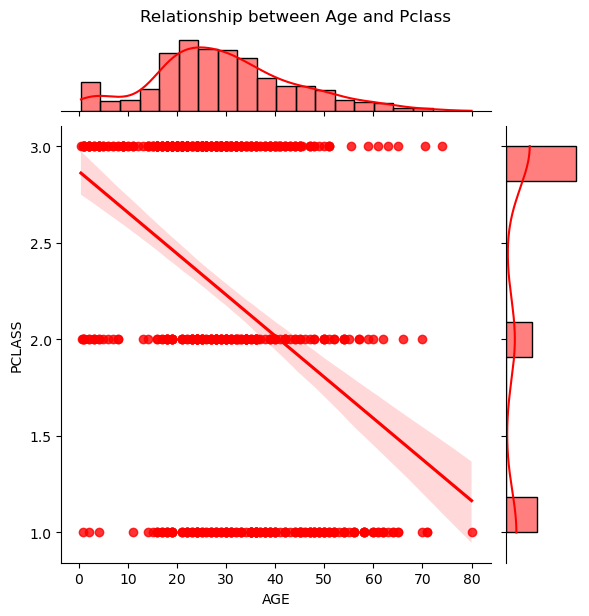

In [6]:
jointplot = sns.jointplot(x='AGE', y='PCLASS', data=df, kind='reg', color='red')
jointplot.fig.suptitle(f'Relationship between Age and Pclass', y=1.02)

**Boxplot Analysis Results:**

- **Variable 1 (Age):**
  - The boxplot for Age shows a relatively symmetric distribution. There are a few outliers on the higher side, suggesting some passengers were significantly older than the majority.

- **Variable 2 (Fare):**
  - The Fare boxplot reveals a positively skewed distribution, indicating that most passengers paid lower fares, with a few paying significantly higher amounts. 

- **Variable 3 (Pclass):**
  - The boxplot for Pclass, representing passenger class, indicates distinct differences between classes. Higher classes have higher median values, showing a correlation between socio-economic status and ticket class.

- **Variable 4 (SibSp):**
  - The SibSp boxplot illustrates the distribution of the number of siblings/spouses aboard. The majority of passengers traveled without siblings or spouses, but there are some outliers with larger values.

These observations provide insights into the distributions and characteristics of the selected variables, helping to understand the central tendencies and potential variations in the data.

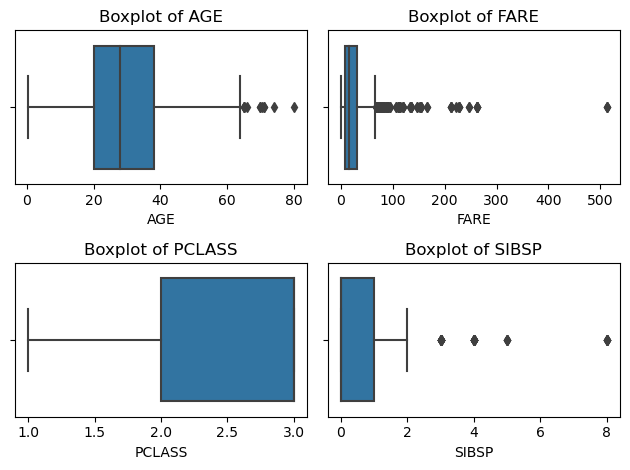

In [7]:
selected_variables = ['AGE', 'FARE', 'PCLASS', 'SIBSP']

fig, axes = plt.subplots(nrows=2, ncols=2)

sns.boxplot(x=df[selected_variables[0]], ax=axes[0, 0])
sns.boxplot(x=df[selected_variables[1]], ax=axes[0, 1])
sns.boxplot(x=df[selected_variables[2]], ax=axes[1, 0])
sns.boxplot(x=df[selected_variables[3]], ax=axes[1, 1])

axes[0, 0].set_title(f'Boxplot of {selected_variables[0]}')
axes[0, 1].set_title(f'Boxplot of {selected_variables[1]}')
axes[1, 0].set_title(f'Boxplot of {selected_variables[2]}')
axes[1, 1].set_title(f'Boxplot of {selected_variables[3]}')

plt.tight_layout()

plt.show()

**1.1 Feature Extraction:**

In this part, we are creating as much as possible new features (columns) in our dataset by extracting meaningful information or combining existing features.

In [8]:
# Cabin bool
df['NEW_CABIN_BOOL'] = df['CABIN'].notnull().astype('int')
# Name count
df['NEW_NAME_COUNT'] = df['NAME'].str.len()
# name word count
df['NEW_NAME_WORD_COUNT'] = df['NAME'].apply(lambda x: len(str(x).split(" ")))
# name dr
df['NEW_NAME_DR'] = df['NAME'].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)
# family size
df['NEW_FAMILY_SIZE'] = df['SIBSP'] + df['PARCH'] + 1
# age_pclass
df['NEW_AGE_PCLASS'] = df['AGE'] * df['PCLASS']
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), 'NEW_IS_ALONE'] = 'NO'
df.loc[((df['SIBSP'] + df['PARCH']) == 0), 'NEW_IS_ALONE'] = 'YES'
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'


In [9]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,51,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [10]:
df.shape

(891, 22)

If we look up to our dataset's shape, we have 10 new features. These new features aim to capture additional insights from the existing data, providing more information for machine learning models.

We have an unwanted variable in numerical variables; PASSENGERID. Since PASSENGERID is not a numerical variable, we are excluding it.

In [11]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if 'PASSENGERID' not in col]

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


**1.2. Outlier Handling:**

We are detecting outliers for numerical categories using the `check_outliers` function. 

In [12]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


It returns `True`, indicating that there are outliers in numerical categories. Now, we are updating the lower and upper limits using the `replace_with_thresholds` function. Then, let's check if there any outliers left.

In [13]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [14]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


As we want, it returns `False`!

**1.3. Missing Values Handling:**

In [15]:
missing_values_table(df)

                n_miss  ratio
CABIN              687 77.100
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


We just not have missing values in our original features but also in the new ones. This is an expected situation because the new features dependent to the original ones. 

We're dropping the 'CABIN' and 'NAME' variables since we've created new variables named 'NEW_CABIN_BOOL', 'NEW_NAME_COUNT', 'NEW_NAME_WORD_COUNT', 'NEW_NAME_DR' and 'NEW_TITLE'. We also don't need the 'TICKET' variable.

In [16]:
remove_cols = ['CABIN', 'TICKET', 'NAME']
df.drop(remove_cols, inplace=True, axis=1)

We have to fill missing values in the 'AGE' column. We are imputing missing values in the 'AGE' column based on the median age within each 'NEW_TITLE' group. This is a common strategy to impute missing values using group-specific medians, which can provide more accurate imputations compared to using a global median.

In [17]:
df['AGE'] = df['AGE'].fillna(df.groupby('NEW_TITLE')['AGE'].transform('median'))

Now, the missing values for the 'AGE' column are gone. What will happen to the variables created based on this 'AGE' variable? We have to create them again.

In [18]:
df['NEW_AGE_PCLASS'] = df['AGE'] * df['PCLASS']

df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [19]:
missing_values_table(df)

          n_miss  ratio
EMBARKED       2  0.220


Everthing seems fine till the 'EMBARKED' column. To get rid of the missing values, we are filling them using the mode (most frequent value) for categorical columns (columns with dtype "O") that have 10 or fewer unique values.

In [20]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [21]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


**1.4. Label Encoding and Rare Category Handling:**

In this part, first, we are encoding binary categorical variables using a label encoder. 

In [22]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
binary_cols

['SEX', 'NEW_IS_ALONE']

In [23]:
for col in binary_cols:
    df = label_encoder(df, col)

As we can see, we hade two variables and encoded them with a label encoder. 

When we ask 'what to do now after label encoding?', one-hot encoding should come to our mind. However, first, we will perform rare encoding so that after potential reductions, we can proceed with one-hot encoding. For this reason, we call the `rare_analyser` function and analyze.

In [24]:
rare_analyser(df, 'SURVIVED', cat_cols)

SEX : 2
     COUNT  RATIO  TARGET_MEAN
SEX                           
0      314  0.352        0.742
1      577  0.648        0.189


EMBARKED : 3
          COUNT  RATIO  TARGET_MEAN
EMBARKED                           
C           168  0.189        0.554
Q            77  0.086        0.390
S           646  0.725        0.339


NEW_TITLE : 17
           COUNT  RATIO  TARGET_MEAN
NEW_TITLE                           
Capt           1  0.001        0.000
Col            2  0.002        0.500
Countess       1  0.001        1.000
Don            1  0.001        0.000
Dr             7  0.008        0.429
Jonkheer       1  0.001        0.000
Lady           1  0.001        1.000
Major          2  0.002        0.500
Master        40  0.045        0.575
Miss         182  0.204        0.698
Mlle           2  0.002        1.000
Mme            1  0.001        1.000
Mr           517  0.580        0.157
Mrs          125  0.140        0.792
Ms             1  0.001        1.000
Rev            6  0.007    

When we look at the observation rates there are some classes, which have to be merged with the `rare_encoder` function. 

In [25]:
df = rare_encoder(df, 0.01)

**1.6. One-Hot Encoding:**

Let's perform the one-hot encoding process. Here, we need to convert all categorical variables in the dataset again. Additionally, we already have many newly created variables. Hence, it is necessary to carry out this process.

In [26]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

In [27]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.000,7.250,0,23,0,66.000,0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2,1,0,38.000,65.634,1,45,0,38.000,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,0,26.000,7.925,0,22,0,78.000,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,1,0,35.000,53.100,1,44,0,35.000,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,0,1,35.000,8.050,0,24,0,105.000,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [28]:
df.shape

(891, 52)

Let's take a look at the head() to see 'Where are we at?' Pay attention! Look, all possible categorical variables have been transformed. Let's look at a practical example. For instance, the new gender category 'NEW_SEX_CAT_seniorfemale' has transformed into a variable. The family size variable has also changed because its unique value count is less than 10. However, these are interpretations. Similarly, other relevant variables have undergone the transformation process. 

Now, let's see how many variables we have in the new dataset. It turns out we have 52 variables. We had 12 before, and it seems we've created 38 new variables.

We also should take a look at the new variables, if they are carrying informations or if they are useless. So, we have to stop in the flow, go back again to `grab_col_names` and update `num_cols` also analyze it.



In [29]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 52
cat_cols: 47
num_cols: 5
cat_but_car: 0
num_but_cat: 47


In [30]:
num_cols = [col for col in num_cols if 'PASSENGERID' not in col]
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

What are we looking for? We want the frequency and ratio to be at least close to each other for these newly created variables. I am observing how meaningful these new variables are in terms of TARGET_MEAN. For example, the variable created based on whether the family size is 11 or not. it seems to carry not much information. Therefore, it seems like a pointless variable.

The problem here is, is there any binary variable with classes, and one of the classes has less than 0.01 frequency? `useless_cols` identifies binary variables where one of the classes is very infrequent, making it potentially less informative for analysis or modeling. These columns are considered "useless" due to the imbalance in class frequencies. We can easily drop these.

In [31]:
rare_analyser(df, 'SURVIVED', cat_cols)

SURVIVED : 2
          COUNT  RATIO  TARGET_MEAN
SURVIVED                           
0           549  0.616        0.000
1           342  0.384        1.000


SEX : 2
     COUNT  RATIO  TARGET_MEAN
SEX                           
0      314  0.352        0.742
1      577  0.648        0.189


NEW_CABIN_BOOL : 2
                COUNT  RATIO  TARGET_MEAN
NEW_CABIN_BOOL                           
0                 687  0.771        0.300
1                 204  0.229        0.667


NEW_NAME_DR : 2
             COUNT  RATIO  TARGET_MEAN
NEW_NAME_DR                           
0              881  0.989        0.383
1               10  0.011        0.500


NEW_IS_ALONE : 2
              COUNT  RATIO  TARGET_MEAN
NEW_IS_ALONE                           
0               354  0.397        0.506
1               537  0.603        0.304


PCLASS_2 : 2
          COUNT  RATIO  TARGET_MEAN
PCLASS_2                           
False       707  0.793        0.361
True        184  0.207        0.473


PCLASS

In [32]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]
useless_cols

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [33]:
df.drop(useless_cols, axis=1, inplace=True)

**2. ML Model:**

In the next steps, we will construct and assess the performance of a _Random Forest_ classifier on the Titanic dataset.

In this work, the dependent variables is 'SURVIVED' and the independet variables are other than 'PASSENGERID' and 'SURVIVED'.

In [34]:
y = df['SURVIVED']
X = df.drop(['PASSENGERID', 'SURVIVED'], axis=1)

We proceed to split the dataset into training and testing sets using the `train_test_split` function from _scikit-learn_. 70% of the data will be used for training the model, and 30% will be reserved for evaluating its performance.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

Next, we create a _Random Forest_ model using the _RandomForestClassifier_ from _scikit-learn_. The model is trained on the training set (X_train and y_train). 

After training the model, we use it to make predictions on the test set (X_test). The predicted values (y_pred) represent the model's estimations of whether each passenger survived or not. Finally, we assess the accuracy of the Random Forest model by comparing its predictions (y_pred) against the actual outcomes in the test set (y_test).

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [37]:
accuracy_score(y_pred, y_test)

0.8059701492537313

The accuracy score provides a measure of how well the model performs on unseen data. A higher accuracy indicates better predictive performance. Our accuracy score is 80%. This means with the feature engineering steps we're able to predict better if a passenger would survive or not.

**3. Conluction: Evaluation of Newly Created Variables:**

Feature importance reveals which aspects of the dataset contribute most significantly to the model's decision-making. It allows us to pinpoint variables that hold sway in predicting outcomes, providing actionable insights and aiding in informed decision-making.

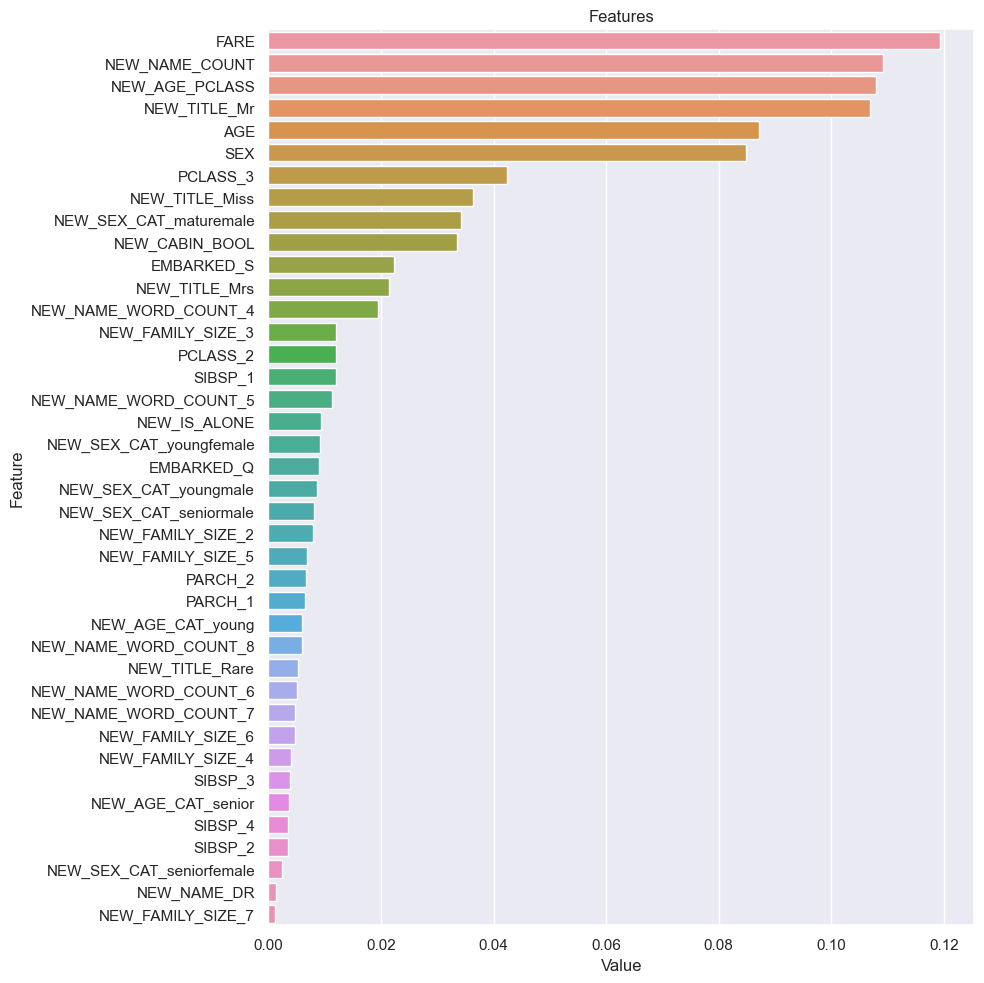

In [38]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value',
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)

Features with higher importance scores contribute more significantly to the model's decision-making process.
The top features, such as new_name_count and new_age_pclass, provide valuable insights into the characteristics influencing survival predictions.
Understanding the significance of these features allows for more informed analysis and potential refinement of the model.

In summary, the feature importance plot highlights key variables, such as 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS', and 'NEW_TITLE_MR', which play a crucial role in the _Random Forest_ model's predictions on the Titanic dataset.

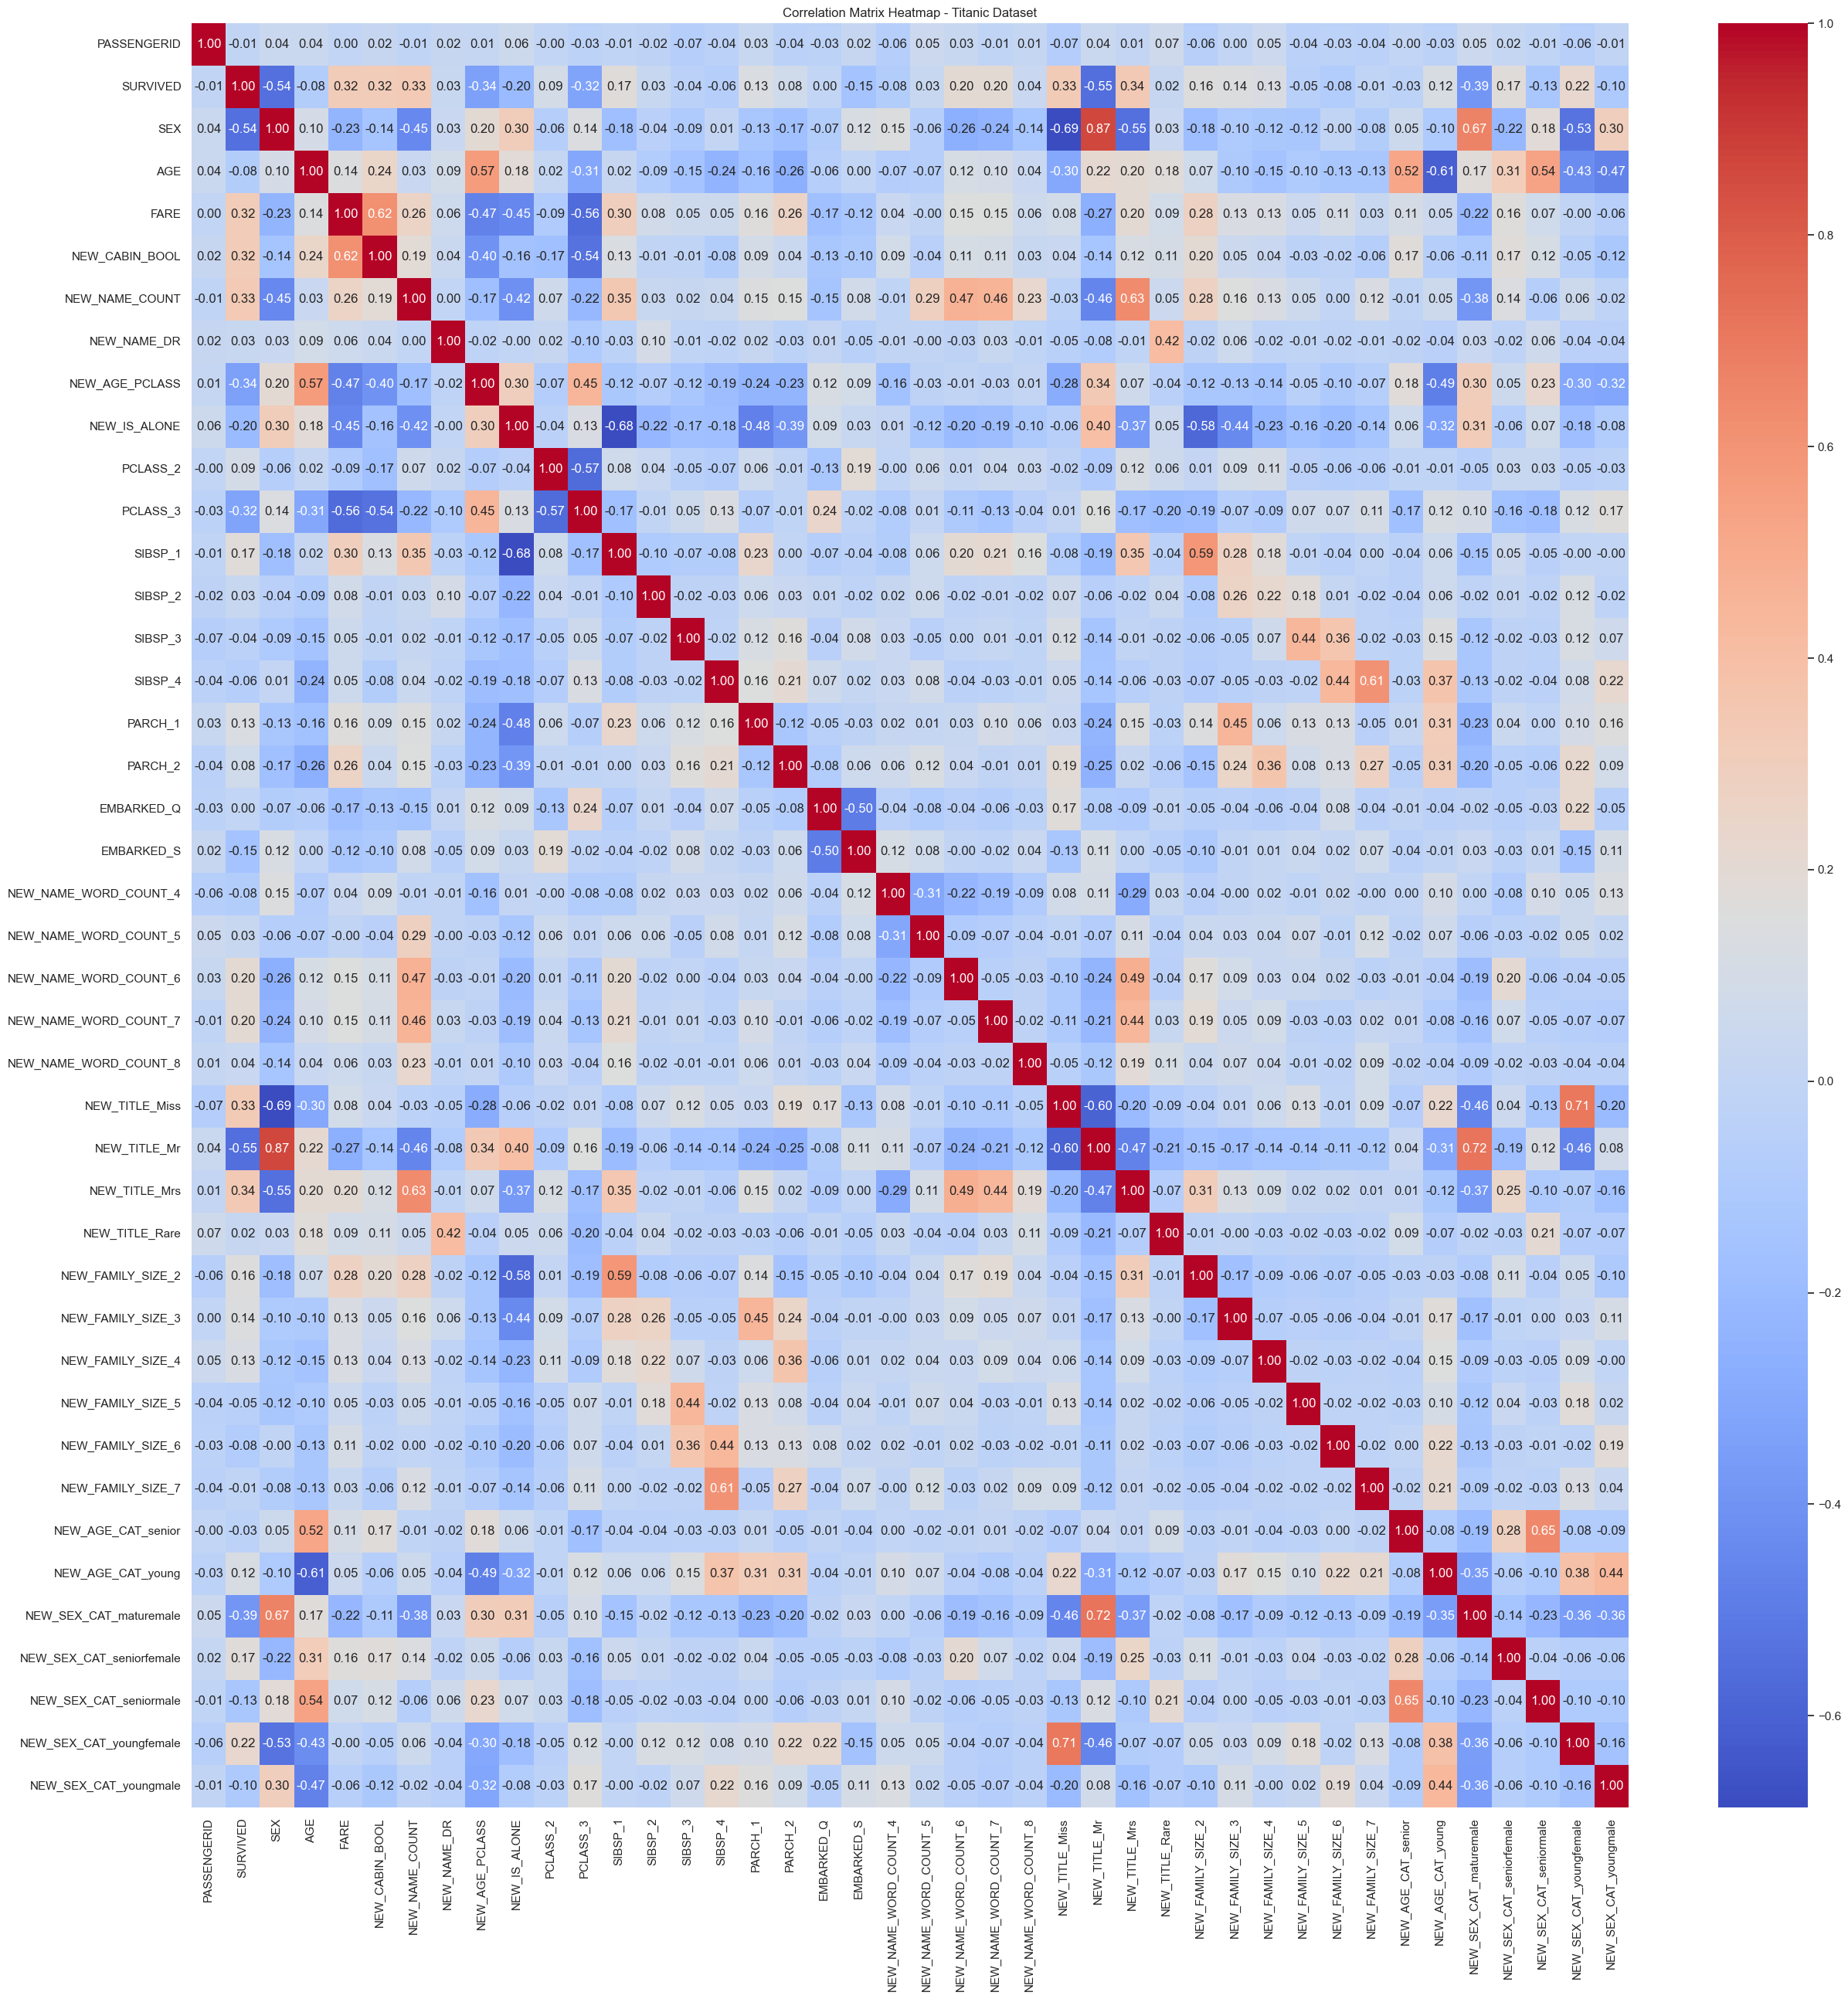

In [39]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap - Titanic Dataset')
plt.show()